In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ligue180-2019.csv", sep=';')
data.head()

,data_atendimento,tipo_atendimento,grupo_violacao,sub_grupo_violacao,data_cenario,hora_cenario,cenario_local,cenario_ocorrencia,relacao_demandante,relacao_suspeito,...,suspeito_pf_sexo,suspeito_pf_escolaridade,suspeito_pf_identidade_genero,suspeito_pf_cor_raca,suspeito_pf_orientacao_sexual,suspeito_pj_cod_municipio,suspeito_pj_municipio,suspeito_pj_uf,suspeito_pj_qualificacao_juridica,violacoes
0,2019-02-03 18:06:22.000,CENTRAL DE ATENDIMENTO,Feminicídio,Não se aplica,2019-02-03 00:00:00.0000000,17:40,Casa da vítima/agressor,Não informado,Não se aplica,Companheiro (a),...,Masculino,Não informado,Não informado,Parda,Não informado,NaN,(),N/D,N/D,Feminicídio.Tentativa de Feminicídio
1,2019-02-11 07:34:18.000,CENTRAL DE ATENDIMENTO,Violência Institucional,Não se aplica,NaN,N/D,Delegacia,Diariamente,Própria vítima,Não se aplica,...,Não informado,Não informado,Não informado,Não informado,Não informado,NaN,(),N/D,N/D,Violência Institucional.Negligencia
2,2019-02-21 21:15:08.000,CENTRAL DE ATENDIMENTO,Ameaça,Não se aplica,NaN,N/D,Casa do suspeito,Não informado,Não se aplica,Não se aplica,...,Feminino,Não informado,Não informado,Não informado,Não informado,NaN,(),N/D,N/D,Ameaça.Ameaça
3,2019-04-06 11:24:18.000,CENTRAL DE ATENDIMENTO,Outros Registros,Não se aplica,NaN,N/D,Outros,Diariamente,Irmão (ã),Não informado,...,Não informado,Não informado,Não informado,Não informado,Não informado,NaN,(),N/D,N/D,Outros Registros.Tragédia Brumadinho
4,2019-04-27 01:11:42.000,CENTRAL DE ATENDIMENTO,Violência Moral,Não se aplica,NaN,N/D,Outros,Única vez,Própria vítima,Desconhecido(a),...,Não informado,Não informado,Não informado,Não informado,Não informado,NaN,(),N/D,N/D,Violência Moral.Calúnia;Violência Moral.Injúria


In [3]:
print(data.describe())

       vitima_cod_municipio  suspeito_pf_cod_municipio  \
count          1.077970e+05               1.079660e+05   
mean           3.379479e+06               3.330520e+06   
std            9.014469e+05               9.881793e+05   
min            1.100023e+06               0.000000e+00   
25%            2.928901e+06               2.927408e+06   
50%            3.304557e+06               3.304557e+06   
75%            3.550308e+06               3.550308e+06   
max            5.300108e+06               5.300108e+06   

       suspeito_pj_cod_municipio  
count               3.890000e+02  
mean                3.577684e+06  
std                 8.043314e+05  
min                 1.302603e+06  
25%                 3.133501e+06  
50%                 3.304557e+06  
75%                 4.303806e+06  
max                 5.300108e+06  


In [4]:
data['grupo_violacao'].unique()

array(['Feminicídio', 'Violência Institucional', 'Ameaça',
       'Outros Registros', 'Violência Moral', 'Violência Sexual',
       'Violência Doméstica e Familiar', 'Cárcere Privado',
       'Violência Policial', 'Violência Física', 'Homicídio',
       'Violência Obstétrica', 'Violência Virtual',
       'Violência contra Diversidade Religiosa', 'Trabalho Escravo',
       'Tráfico de Mulheres'], dtype=object)

In [5]:
data['grupo_violacao'].value_counts()

grupo_violacao
Violência Doméstica e Familiar            74593
Violência Moral                            6503
Ameaça                                     5590
Feminicídio                                5317
Violência Institucional                    4752
Violência Física                           2948
Violência Sexual                           2624
Cárcere Privado                            2376
Outros Registros                           1381
Violência Policial                         1122
Violência Virtual                           364
Violência Obstétrica                        236
Homicídio                                   172
Tráfico de Mulheres                          78
Violência contra Diversidade Religiosa       25
Trabalho Escravo                             23
Name: count, dtype: int64

In [6]:
# Vamos ver algumas estatísticas do nosso conjunto de dados

data.describe().T

,count,mean,std,min,25%,50%,75%,max
vitima_cod_municipio,107797.0,3.379479e+06,901446.917462,1100023.0,2928901.0,3304557.0,3550308.0,5300108.0
suspeito_pf_cod_municipio,107966.0,3.330520e+06,988179.272703,0.0,2927408.0,3304557.0,3550308.0,5300108.0
suspeito_pj_cod_municipio,389.0,3.577684e+06,804331.447467,1302603.0,3133501.0,3304557.0,4303806.0,5300108.0


In [7]:
# verifique se nossos dados possuem valores nulos
data.isna().sum()

data_atendimento                          0
tipo_atendimento                          0
grupo_violacao                            0
sub_grupo_violacao                    12085
data_cenario                          36335
hora_cenario                              0
cenario_local                             0
cenario_ocorrencia                      147
relacao_demandante                        0
relacao_suspeito                          0
vitima_cod_municipio                    307
vitima_municipio                          0
vitima_uf                               279
vitima_faixa_etaria                       0
vitima_estado_civil                       0
vitima_sexo                               0
vitima_escolaridade                       5
vitima_identidade_genero                  5
vitima_cor_raca                           0
vitima_orientacao_sexual                  0
suspeito_pf_cod_municipio               138
suspeito_pf_municipio                     0
suspeito_pf_uf                  

In [8]:
data.duplicated().sum()

1366

In [9]:
data.isnull().sum()

data_atendimento                          0
tipo_atendimento                          0
grupo_violacao                            0
sub_grupo_violacao                    12085
data_cenario                          36335
hora_cenario                              0
cenario_local                             0
cenario_ocorrencia                      147
relacao_demandante                        0
relacao_suspeito                          0
vitima_cod_municipio                    307
vitima_municipio                          0
vitima_uf                               279
vitima_faixa_etaria                       0
vitima_estado_civil                       0
vitima_sexo                               0
vitima_escolaridade                       5
vitima_identidade_genero                  5
vitima_cor_raca                           0
vitima_orientacao_sexual                  0
suspeito_pf_cod_municipio               138
suspeito_pf_municipio                     0
suspeito_pf_uf                  

In [10]:
data.shape

(108104, 35)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108104 entries, 0 to 108103
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   data_atendimento                   108104 non-null  object 
 1   tipo_atendimento                   108104 non-null  object 
 2   grupo_violacao                     108104 non-null  object 
 3   sub_grupo_violacao                 96019 non-null   object 
 4   data_cenario                       71769 non-null   object 
 5   hora_cenario                       108104 non-null  object 
 6   cenario_local                      108104 non-null  object 
 7   cenario_ocorrencia                 107957 non-null  object 
 8   relacao_demandante                 108104 non-null  object 
 9   relacao_suspeito                   108104 non-null  object 
 10  vitima_cod_municipio               107797 non-null  float64
 11  vitima_municipio                   1081

C:\Users\luizg\AppData\Local\Temp\ipykernel_4772\328263588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vitima_sexo', data=data, palette='Set2')


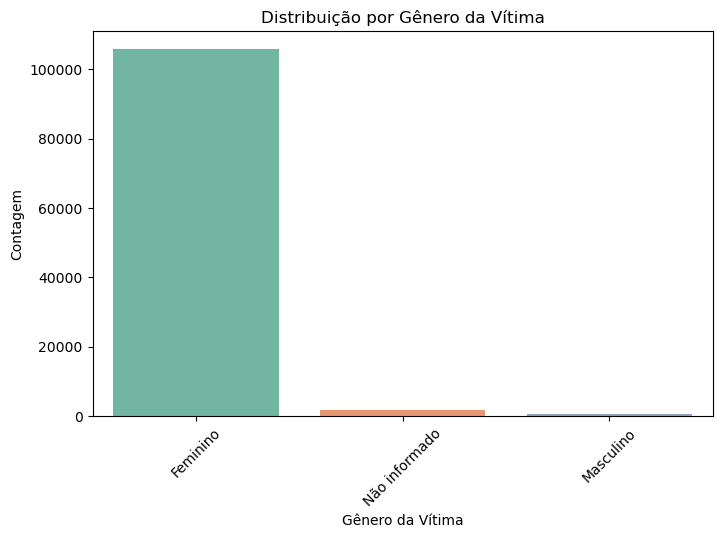

In [12]:
# Gráfico de barras para o sexo da vítima

plt.figure(figsize=(8, 5))
sns.countplot(x='vitima_sexo', data=data, palette='Set2')
plt.title('Distribuição por Gênero da Vítima')
plt.xlabel('Gênero da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [13]:
data['vitima_sexo'].value_counts()

vitima_sexo
Feminino         105749
Não informado      1868
Masculino           487
Name: count, dtype: int64

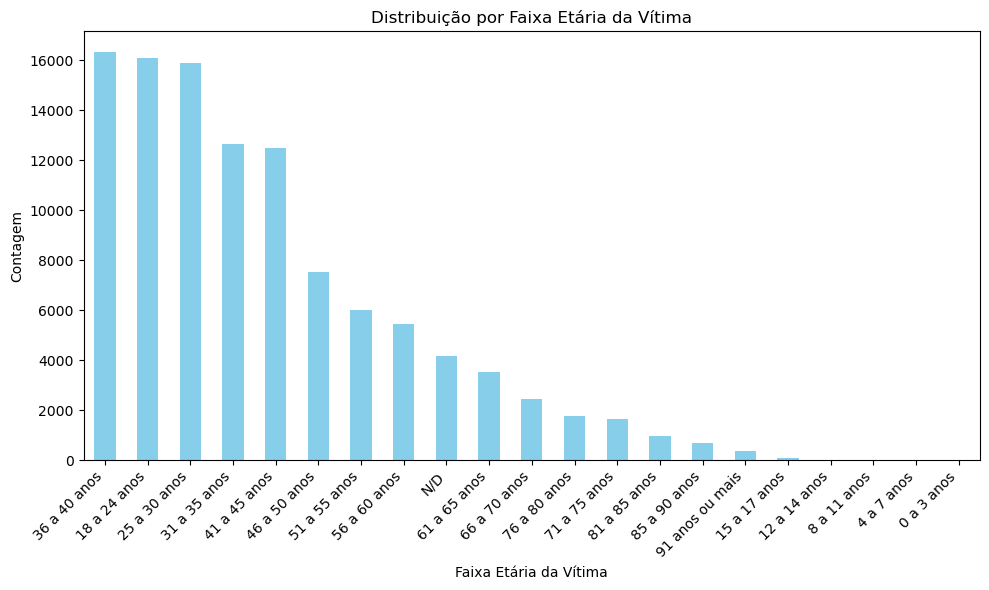

In [14]:
# Remova os valores nulos da coluna 'faixa_etaria_vitima'
data = data.dropna(subset=['vitima_faixa_etaria'])

# Função para definir os intervalos de faixa etária
def definir_intervalo_faixa_etaria(idade):
    try:
        idade_int = int(idade)
        if idade_int < 100:  # Vamos considerar apenas idades menores que 100 para evitar erros
            inicio = idade_int // 10 * 10
            fim = inicio + 9
            return f"{inicio} a {fim} anos"
    except ValueError:
        return idade

# Aplica a função para criar os intervalos de faixa etária
data['vitima_faixa_etaria'] = data['vitima_faixa_etaria'].apply(definir_intervalo_faixa_etaria)

# Gráfico de barras para a faixa etária da vítima

plt.figure(figsize=(10, 6))
data['vitima_faixa_etaria'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição por Faixa Etária da Vítima')
plt.xlabel('Faixa Etária da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\luizg\AppData\Local\Temp\ipykernel_4772\1984437186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vitima_cor_raca', data=data, palette='Set3')


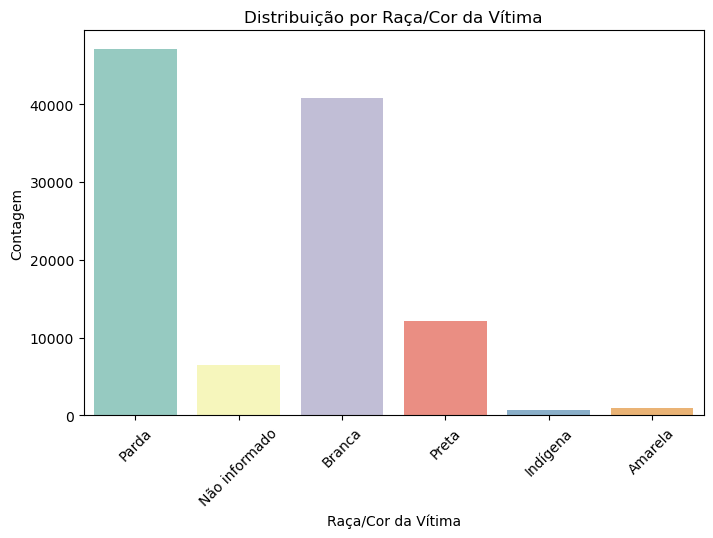

In [15]:
# Gráfico de barras para a raça/cor da vítima

plt.figure(figsize=(8, 5))
sns.countplot(x='vitima_cor_raca', data=data, palette='Set3')
plt.title('Distribuição por Raça/Cor da Vítima')
plt.xlabel('Raça/Cor da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [16]:
data['vitima_cor_raca'].value_counts()

vitima_cor_raca
Parda            47115
Branca           40832
Preta            12097
Não informado     6434
Amarela            934
Indígena           692
Name: count, dtype: int64

In [17]:
data['vitima_municipio'].value_counts()

vitima_municipio
Rio de Janeiro                                (RJ)    9416
Sao Paulo                                     (SP)    5986
Brasilia                                      (DF)    3205
Nova Iguacu                                   (RJ)    2690
Belo Horizonte                                (MG)    2124
                                                      ... 
Sebastianopolis do Sul                        (SP)       1
Joia                                          (RS)       1
Sucupira do Riachao                           (MA)       1
Mirante da Serra                              (RO)       1
Sao Jose do Herval                            (RS)       1
Name: count, Length: 4121, dtype: int64

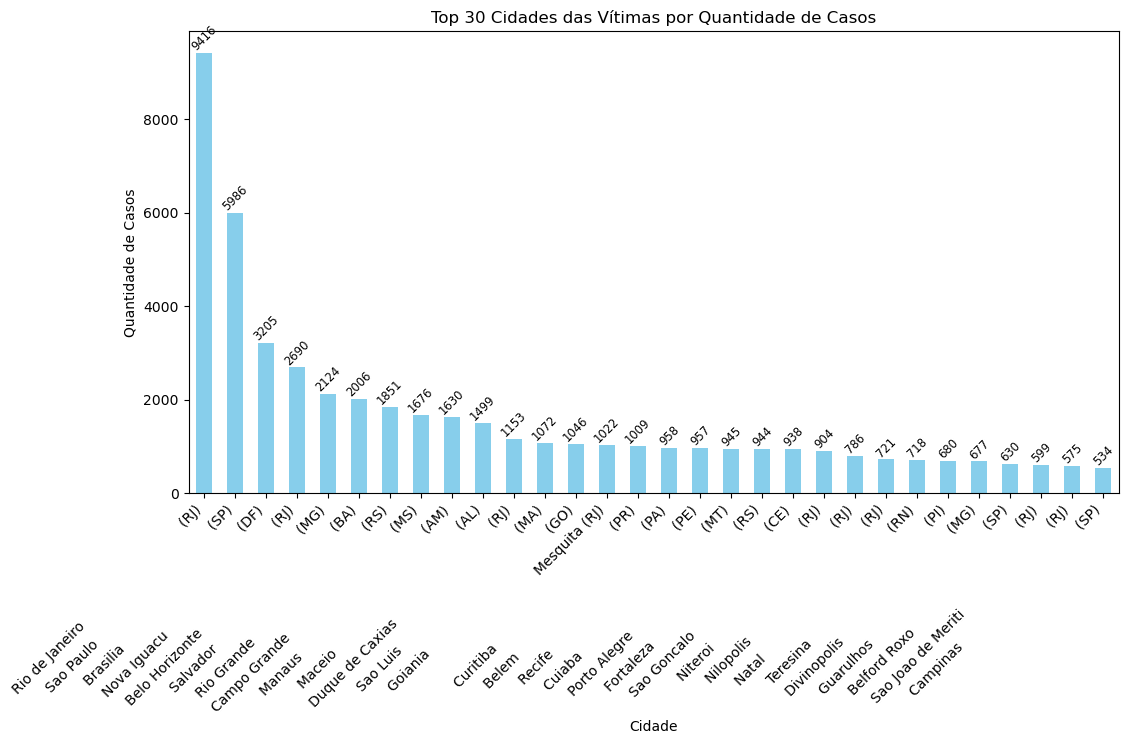

In [18]:
# Use o método value_counts para contar a quantidade de casos em cada cidade das vítimas
top_cidades_vitimas = data['vitima_municipio'].value_counts().head(30)

# Exiba as 30 principais cidades das vítimas por quantidade de casos em um gráfico de barras
plt.figure(figsize=(12, 6))
top_cidades_vitimas.plot(kind='bar', color='skyblue')
plt.title('Top 30 Cidades das Vítimas por Quantidade de Casos')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_cidades_vitimas.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small', rotation=45)

# Mostrando o grafico
plt.show()


In [19]:
#Chamando a biblioteca Wordcloud (nuvem de palavras)
! pip install wordcloud

In [20]:
motivacao_str = data["grupo_violacao"].to_string()

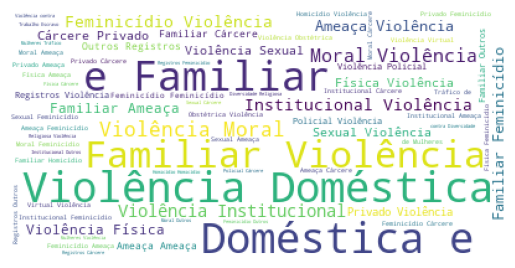

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Criando a nuvem de palavras
wordcloud = WordCloud(max_words=100, background_color="white").generate(motivacao_str)

#Grafico da nuvem de palavras
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Frequência de denúncias: Vamos verificar a distribuição das denúncias ao longo do tempo para identificar tendências temporais e sazonalidades. Isso pode revelar padrões de aumento ou diminuição da violência em determinados períodos.

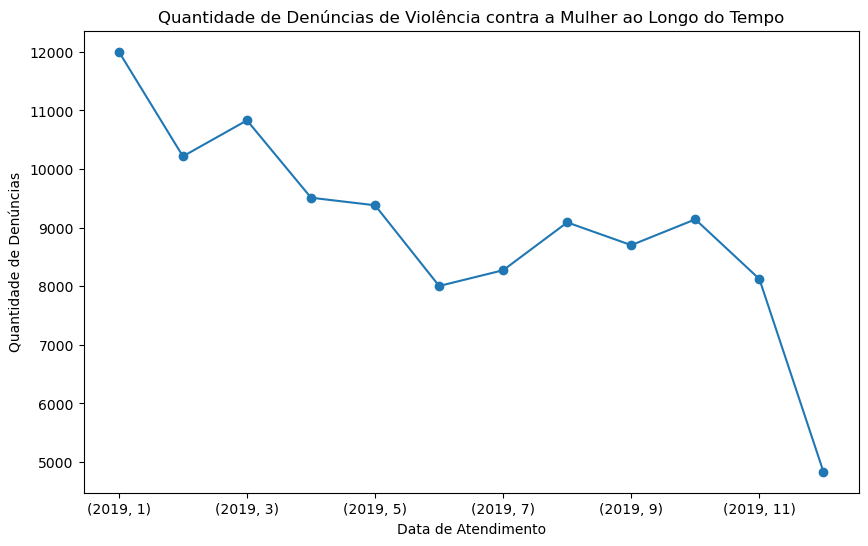

In [22]:
# Transformando a coluna 'data_cadastro' está no formato datetime

data['data_atendimento'] = pd.to_datetime(data['data_atendimento'])

# Extração do ano e o mês da coluna 'Data_de_cadastro'

data['ano'] = data['data_atendimento'].dt.year
data['mes'] = data['data_atendimento'].dt.month

# Contagem do número de denúncias em cada mês
frequencia_denuncias = data.groupby(['ano', 'mes']).size()

# Criação de um gráfico de linha para visualizar a frequência de denúncias ao longo do tempo

plt.figure(figsize=(10, 6))
frequencia_denuncias.plot(kind='line', marker='o')
plt.xlabel('Data de Atendimento')
plt.ylabel('Quantidade de Denúncias')
plt.title('Quantidade de Denúncias de Violência contra a Mulher ao Longo do Tempo')
plt.show()

In [23]:
# Obter a primeira e a última data do dataset

primeira_data = data['data_atendimento'].min()
ultima_data = data['data_atendimento'].max()

print('Primeira data:', primeira_data)
print('Última data:', ultima_data)


Primeira data: 2019-01-01 00:27:12
Última data: 2019-12-23 17:17:15


## Analisando o cenário da violação. 

In [24]:
data['cenario_local'].value_counts()

cenario_local
Casa da vítima/agressor                               40784
Casa da vítima                                        27538
Outros                                                18507
Via pública                                            7660
Casa do suspeito                                       3914
Ambiente virtual                                       2313
Delegacia                                              1921
Casa de amigos ou familiares                           1521
Local de trabalho da vítma                             1107
Estabelecimento de saúde                                681
Bar, lanchonete ou casa noturna                         439
Defensoria pública                                      287
Juizado                                                 259
Shopping, cinema, clube ou outro ambiente de lazer      228
Ônibus                                                  218
 Estabelecimento de ensino                              190
N/D                       

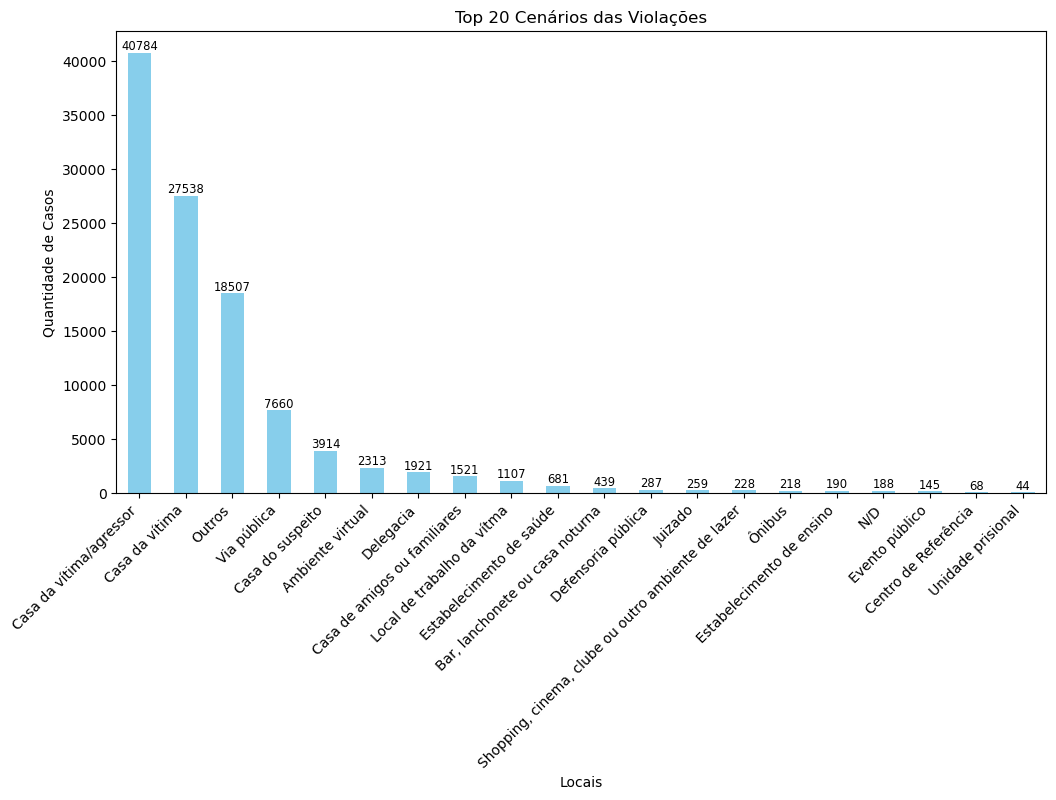

In [25]:
# Use o método value_counts para contar a quantidade de denuncias nos cenários de violação
top_cenario_violacao = data['cenario_local'].value_counts().head(20)

# Exibir as 20 principais locais onde as vitimas informam as denuncias
plt.figure(figsize=(12, 6))
top_cenario_violacao.plot(kind='bar', color='skyblue')
plt.title('Top 20 Cenários das Violações')
plt.xlabel('Locais')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_cenario_violacao.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small')

# Mostrando o grafico
plt.show()

## Horarios mais frequentes de denuncias

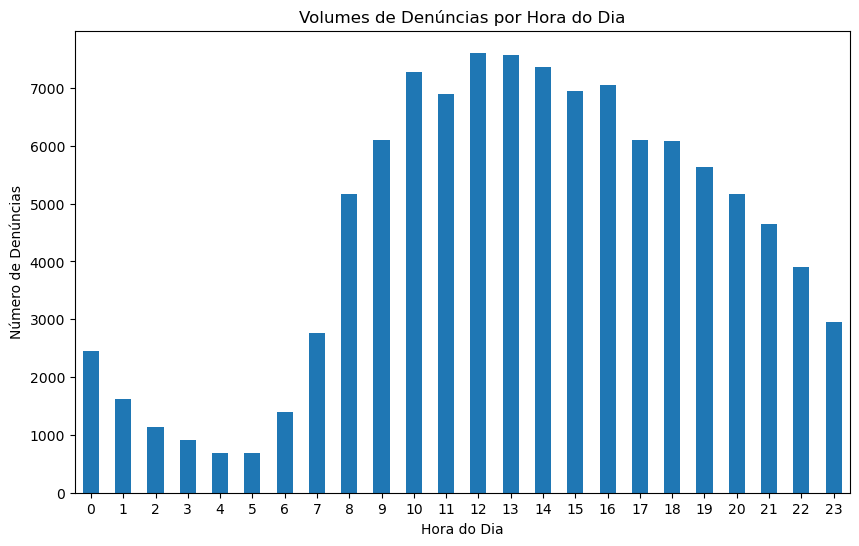

In [26]:
# Extrair a hora da coluna 'data_cadastro'
data['hora'] = data['data_atendimento'].dt.hour

# Calcular o número de denúncias para cada hora
denuncias_por_hora = data['hora'].value_counts()

# Ordenar as horas em ordem crescente
denuncias_por_hora = denuncias_por_hora.sort_index()

# Plotar o gráfico de barras para visualizar os volumes de denúncias por hora
plt.figure(figsize=(10, 6))
denuncias_por_hora.plot(kind='bar')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Denúncias')
plt.title('Volumes de Denúncias por Hora do Dia')
plt.xticks(rotation=0)
plt.show()

* Podemos notar que as denuncias ocorrem mais durante o dia entre os horarios das 10h as 16h

In [27]:
data['cenario_ocorrencia'].value_counts()

cenario_ocorrencia
Diariamente       40548
Ocasionalmente    20528
Não informado     15592
Semanalmente      15436
Única vez         10978
Mensalmente        3803
Quinzenalmente      982
Toda tarde           54
Toda manhã           36
Name: count, dtype: int64

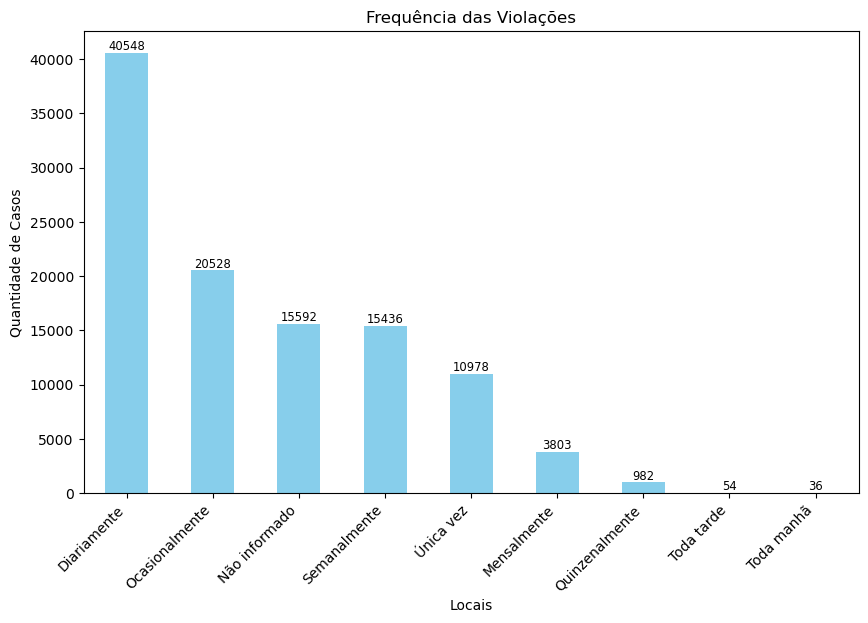

In [28]:
# Use o método value_counts para contar a quantidade de denuncias nos cenários de violação
top_frequencia= data['cenario_ocorrencia'].value_counts()

# Exibir as 20 principais locais onde as vitimas informam as denuncias
plt.figure(figsize=(10, 6))
top_frequencia.plot(kind='bar', color='skyblue')
plt.title('Frequência das Violações')
plt.xlabel('Locais')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_frequencia.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small')

# Mostrando o grafico
plt.show()

In [29]:
# Extrair dados da coluna "relação_vitima_suspeito"

relacao_vitima_suspeito = data['relacao_suspeito']

# Contar o numero de ocorrencias para cada relacionamento

relacao_count = relacao_vitima_suspeito.value_counts()

# Organização dos dados do maior para o menor

relacao_count.sort_values(ascending=False)

# Mostrar os 5 principais
print(relacao_count.head())

relacao_suspeito
Companheiro (a)       25606
Ex-Companheiro (a)    13249
Não se aplica         11977
Marido                 9419
Filho (a)              7491
Name: count, dtype: int64


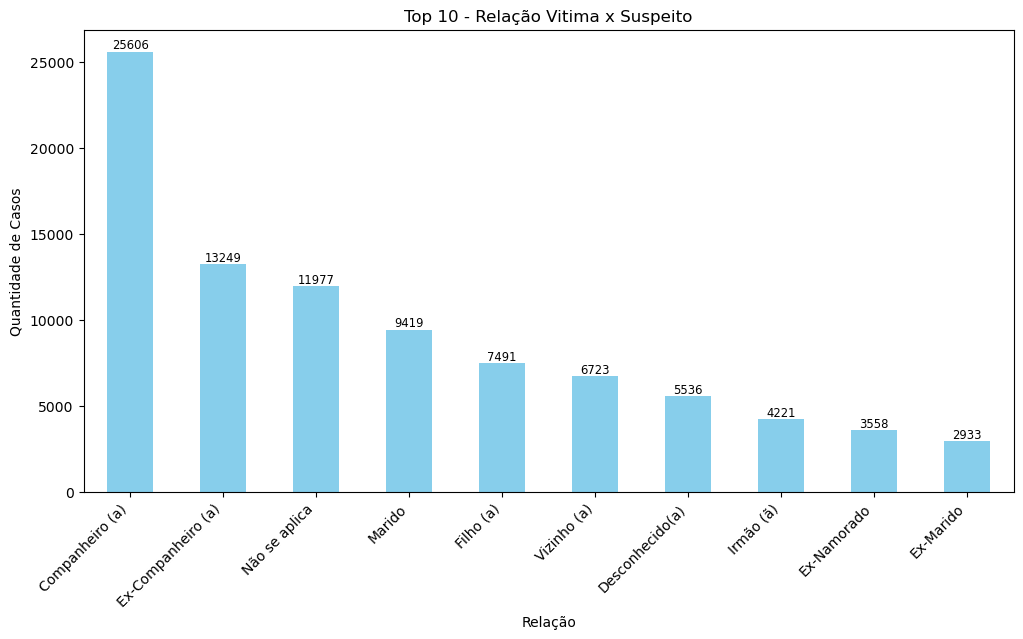

In [30]:
# Use o método value_counts para contar a quantidade de denuncias nos cenários de violação
top_vitima_suspeito= data['relacao_suspeito'].value_counts().head(10)

# Exibir as 20 principais locais onde as vitimas informam as denuncias
plt.figure(figsize=(12, 6))
top_vitima_suspeito.plot(kind='bar', color='skyblue')
plt.title('Top 10 - Relação Vitima x Suspeito')
plt.xlabel('Relação')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_vitima_suspeito.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small')

# Mostrando o grafico
plt.show()

In [31]:
# Extrair dados da coluna "relação_vitima_suspeito"

relacao_vitima_suspeito = data['relacao_suspeito']

# Contar o numero de ocorrencias para cada relacionamento

relacao_count = relacao_vitima_suspeito.value_counts()

# Organização dos dados do maior para o menor

relacao_count.sort_values(ascending=False)

# Mostrar os 5 principais
print(relacao_count.head())

relacao_suspeito
Companheiro (a)       25606
Ex-Companheiro (a)    13249
Não se aplica         11977
Marido                 9419
Filho (a)              7491
Name: count, dtype: int64


In [32]:
# Criando uma lista com as relaçõesfffffffffff
relacoes = ["Companheiro (a)", "Ex-Companheiro (a)", "Não se aplica "]

# Criando um DataFrame com as linhas relacionadas às relações
dados_filtrados = data[data["relacao_suspeito"].isin(relacoes)]

# Mostrando o DataFrame
dados_filtrados.head()

,data_atendimento,tipo_atendimento,grupo_violacao,sub_grupo_violacao,data_cenario,hora_cenario,cenario_local,cenario_ocorrencia,relacao_demandante,relacao_suspeito,...,suspeito_pf_cor_raca,suspeito_pf_orientacao_sexual,suspeito_pj_cod_municipio,suspeito_pj_municipio,suspeito_pj_uf,suspeito_pj_qualificacao_juridica,violacoes,ano,mes,hora
0,2019-02-03 18:06:22,CENTRAL DE ATENDIMENTO,Feminicídio,Não se aplica,2019-02-03 00:00:00.0000000,17:40,Casa da vítima/agressor,Não informado,Não se aplica,Companheiro (a),...,Parda,Não informado,NaN,(),N/D,N/D,Feminicídio.Tentativa de Feminicídio,2019,2,18
27,2019-01-01 00:27:12,CENTRAL DE ATENDIMENTO,Violência Doméstica e Familiar,Não se aplica,2018-12-31 00:00:00.0000000,23:00,Casa da vítima/agressor,Ocasionalmente,Não se aplica,Companheiro (a),...,Preta,Heterossexual,NaN,(),N/D,N/D,Violência Doméstica e Familiar.Violência Físic...,2019,1,0
37,2019-01-01 01:43:20,CENTRAL DE ATENDIMENTO,Violência Doméstica e Familiar,Não se aplica,2019-01-01 00:00:00.0000000,01:30,Casa da vítima/agressor,Semanalmente,Não se aplica,Companheiro (a),...,Branca,Heterossexual,NaN,(),N/D,N/D,Violência Doméstica e Familiar.Violência Físic...,2019,1,1
38,2019-01-01 01:55:03,CENTRAL DE ATENDIMENTO,Violência Doméstica e Familiar,Não se aplica,2019-01-01 00:00:00.0000000,01:40,Outros,Mensalmente,Não se aplica,Companheiro (a),...,Parda,Não informado,NaN,(),N/D,N/D,Violência Doméstica e Familiar.Violência Físic...,2019,1,1
40,2019-01-01 02:04:08,CENTRAL DE ATENDIMENTO,Violência Doméstica e Familiar,Não se aplica,2019-01-01 00:00:00.0000000,02:00,Casa da vítima,Diariamente,Não se aplica,Ex-Companheiro (a),...,Parda,Heterossexual,NaN,(),N/D,N/D,Violência Doméstica e Familiar.Violência Moral...,2019,1,2


In [33]:
# Crie uma coluna com o mês-ano da denúncia
dados_filtrados["mes_ano"] = dados_filtrados["data_atendimento"].dt.strftime("%m-%Y")

# Verificando o dataset com a nova coluna
dados_filtrados.head()

C:\Users\luizg\AppData\Local\Temp\ipykernel_4772\1214390247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados["mes_ano"] = dados_filtrados["data_atendimento"].dt.strftime("%m-%Y")


,data_atendimento,tipo_atendimento,grupo_violacao,sub_grupo_violacao,data_cenario,hora_cenario,cenario_local,cenario_ocorrencia,relacao_demandante,relacao_suspeito,...,suspeito_pf_orientacao_sexual,suspeito_pj_cod_municipio,suspeito_pj_municipio,suspeito_pj_uf,suspeito_pj_qualificacao_juridica,violacoes,ano,mes,hora,mes_ano
0,2019-02-03 18:06:22,CENTRAL DE ATENDIMENTO,Feminicídio,Não se aplica,2019-02-03 00:00:00.0000000,17:40,Casa da vítima/agressor,Não informado,Não se aplica,Companheiro (a),...,Não informado,NaN,(),N/D,N/D,Feminicídio.Tentativa de Feminicídio,2019,2,18,02-2019
27,2019-01-01 00:27:12,CENTRAL DE ATENDIMENTO,Violência Doméstica e Familiar,Não se aplica,2018-12-31 00:00:00.0000000,23:00,Casa da vítima/agressor,Ocasionalmente,Não se aplica,Companheiro (a),...,Heterossexual,NaN,(),N/D,N/D,Violência Doméstica e Familiar.Violência Físic...,2019,1,0,01-2019
37,2019-01-01 01:43:20,CENTRAL DE ATENDIMENTO,Violência Doméstica e Familiar,Não se aplica,2019-01-01 00:00:00.0000000,01:30,Casa da vítima/agressor,Semanalmente,Não se aplica,Companheiro (a),...,Heterossexual,NaN,(),N/D,N/D,Violência Doméstica e Familiar.Violência Físic...,2019,1,1,01-2019
38,2019-01-01 01:55:03,CENTRAL DE ATENDIMENTO,Violência Doméstica e Familiar,Não se aplica,2019-01-01 00:00:00.0000000,01:40,Outros,Mensalmente,Não se aplica,Companheiro (a),...,Não informado,NaN,(),N/D,N/D,Violência Doméstica e Familiar.Violência Físic...,2019,1,1,01-2019
40,2019-01-01 02:04:08,CENTRAL DE ATENDIMENTO,Violência Doméstica e Familiar,Não se aplica,2019-01-01 00:00:00.0000000,02:00,Casa da vítima,Diariamente,Não se aplica,Ex-Companheiro (a),...,Heterossexual,NaN,(),N/D,N/D,Violência Doméstica e Familiar.Violência Moral...,2019,1,2,01-2019


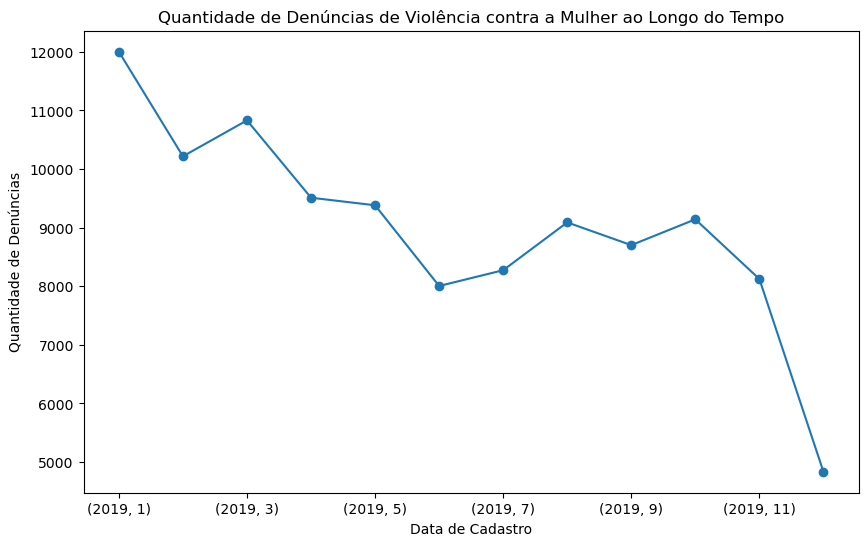

In [34]:

# Extrão do ano e o mês da coluna 'Data_de_cadastro'

data['ano'] = data['data_atendimento'].dt.year
data['mes'] = data['data_atendimento'].dt.month

# Contagem do número de denúncias em cada mês
frequencia_denuncias = data.groupby(['ano', 'mes']).size()

# Criação de um gráfico de linha para visualizar a frequência de denúncias ao longo do tempo

plt.figure(figsize=(10, 6))
frequencia_denuncias.plot(kind='line', marker='o')
plt.xlabel('Data de Cadastro')
plt.ylabel('Quantidade de Denúncias')
plt.title('Quantidade de Denúncias de Violência contra a Mulher ao Longo do Tempo')
plt.show()